# Agenda: Method chaining

1. The theory and basics of method chaining
2. Breaking things apart
3. Selecting columns with `[]`
4. Selecting rows with `.loc`
5. Using `lambda` with `.loc`
6. Using `assign`
7. Using `assign` with `lambda`
8. Using `pipe`

# Method chaining 

Method chaining is a new idea, not in Python and not in other languages. The idea is that if you have an object, and invoke a method on it, you get back an object, and can thus run another method on it.

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [1]:
s = 'abcd efgh'
s.upper()

'ABCD EFGH'

In [2]:
s.upper().split()  # this is method chaining!

['ABCD', 'EFGH']

In [3]:
# this doesn't always work in Python -- whenever we invoke a method on a mutable object
# that then modifies the object, we get back None, and the object is changed.

mylist = [10, 20, 30]
mylist.append(40)  # invoking append modified the list; we didn't need to assign it back to mylist!

mylist

[10, 20, 30, 40]

In [4]:
mylist.append(40).count(10)

AttributeError: 'NoneType' object has no attribute 'count'

In [5]:
mylist

[10, 20, 30, 40, 40]

In [9]:
# in Pandas, so long as we don't assign to a series/data frame, and so long as we don't use inplace=True,
# we will basically always get back an object on which we can run a method.

# but there is an issue, at least in terms of how it looks

s = Series('this is a bunch of strings'.split())

In [13]:
# let's find all of the strings that have > 3 characters

s.loc[s.str.len() > 3]

0       this
3      bunch
5    strings
dtype: object

In [16]:
df = DataFrame({'words':s, 'len':s.str.len()})
df

,words,len
0,this,4
1,is,2
2,a,1
3,bunch,5
4,of,2
5,strings,7


In [18]:
# get the first upper-cased character of each string

df['words'].str.get(0).str.upper()

0    T
1    I
2    A
3    B
4    O
5    S
Name: words, dtype: object

In [19]:
# let's try not to do this on a single line

df['words']
.str.get(0)
.str.upper()

SyntaxError: invalid syntax (182028290.py, line 4)

# The solution: ()

Python assumes that if you have open parentheses, then you're on the same line, even if there are newlines in your code.

What if we open parentheses not because we need them, but because they'll allow us to use multiple lines?

In [20]:
(
    df['words']
    .str.get(0)
    .str.upper()
)

0    T
1    I
2    A
3    B
4    O
5    S
Name: words, dtype: object

In [21]:
np.random.seed(0)
df = DataFrame(np.random.randint(-1000, 1000, [4, 3]),
               index=list('abcd'),
               columns=list('xyz'))
df

,x,y,z
a,-316,-441,653
b,216,-165,-237
c,731,383,33
d,747,-723,778


In [22]:
# I only want columns x and z

df[    ['x', 'z']    ]

,x,z
a,-316,653
b,216,-237
c,731,33
d,747,778


In [24]:
# using method chaining, we can also ask for specific columns

(
    df
    [['x', 'z']]
)

,x,z
a,-316,653
b,216,-237
c,731,33
d,747,778


In [25]:
# what if I want only rows b and d?
# we can use the .loc accessor to retrieve those, in a similar way

(
    df
    [['x', 'z']]
    .loc[['b', 'd']]
)

,x,z
b,216,-237
d,747,778


In [26]:
# I want the mean of columns x and z, and rows b and d

(
    df
    [['x', 'z']]
    .loc[['b', 'd']]
    .mean()
)

x    481.5
z    270.5
dtype: float64

In [27]:
# by the way, we really could have done this with a single call to .loc for the rows + columns
# .loc can take two arguments - the row selector and the column selector

(
    df
    .loc[
        ['b', 'd']   # row selector, we only want rows b+d
        ,
        ['x', 'z']   # column selector, we only want columns x + z
    ]
    .mean()
)

x    481.5
z    270.5
dtype: float64

In [30]:
# What if I want columns x and z, but only where the value of x is > 200?

# we always use boolean indexes in Pandas to retrieve selected rows
df.loc[  df['x'] > 200   ]

,x,y,z
b,216,-165,-237
c,731,383,33
d,747,-723,778


In [32]:
# let's retrieve columns x+z, all rows where x > 200

(
    df
    .loc[
        df['x'] > 200   # row selector, we only want where x > 200
        ,
        ['x', 'z']   # column selector, we only want columns x + z
    ]
    # .mean()
)

,x,z
b,216,-237
c,731,33
d,747,778


In [34]:
# let's retrieve columns x+z, all rows where x > 200 and where z < 200

(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200))   # row selector, we only want where x > 200 and z < 200
        ,
        ['x', 'z']   # column selector, we only want columns x + z
    ]
    # .mean()
)

x    473.5
z   -102.0
dtype: float64

In [36]:
# let's retrieve columns x+z, all rows where x > 200 and where z < 200
# then calculate the mean, and find the index where the mean is greatest

(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200))   # row selector, we only want where x > 200 and z < 200
        ,
        ['x', 'z']   # column selector, we only want columns x + z
    ]
    .mean()
    .idxmax()  # this returns th!e index of the max value
)

'x'

<Axes: >

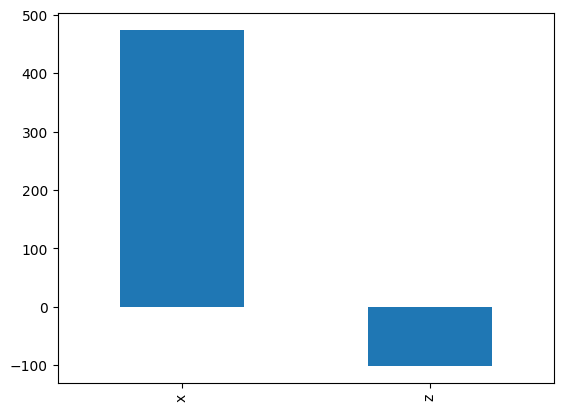

In [37]:
# let's retrieve columns x+z, all rows where x > 200 and where z < 200
# then calculate the mean, and plot them in a bar chart

(
    df
    .loc[
        ((df['x'] > 200) & (df['z'] < 200))   # row selector, we only want where x > 200 and z < 200
        ,
        ['x', 'z']   # column selector, we only want columns x + z
    ]
    .mean()
    .plot.bar()
)

# Exercise: Taxi info

1. Download the NYC taxi data from July 2020, and put it into a data frame.
2. Find those rows where `total_amount` is > \$1000, and the `trip_distance` is less than 10 miles.
3. Then, run a `groupby` on `passenger_count`, and create a bar plot showing the number of such trips for each value of `passenger_count`.

In [41]:
df = pd.read_csv('nyc_taxi_2020-07.csv',
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1.0,1.50,9.30
1,1.0,9.50,27.80
2,1.0,5.85,22.30
3,1.0,1.90,14.16
4,1.0,1.25,7.80
...,...,...,...
800407,NaN,24.23,83.50
800408,NaN,4.40,19.78
800409,NaN,8.78,38.45
800410,NaN,6.50,29.77


In [46]:
# Find those rows where total_amount is > $1000, and the trip_distance is less than 10 miles.

(
    df
    .loc[
        ((df['total_amount'] > 1000) & (df['trip_distance'] < 10))
    ]
)

,passenger_count,trip_distance,total_amount
31607,1.0,1.43,1010.8
420380,1.0,0.00,1995.0


<Axes: xlabel='passenger_count'>

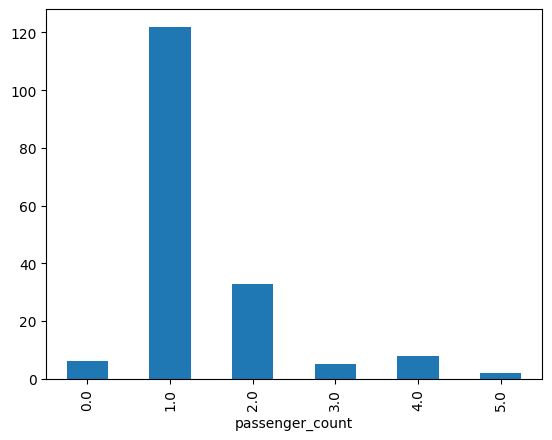

In [49]:
(
    df
    .loc[
        ((df['total_amount'] > 100) & (df['trip_distance'] < 10))
    ]
    .groupby('passenger_count')['trip_distance'].count()
    .plot.bar()
)

# `.loc`

It can take, for its row and column selectors, a number of types of values:

- A single string, indicating a row/column name
- A list of strings, indicating multiple row/column names
- A boolean series, indicating which rows you want
- A function call, which takes the data frame as an argument, and which returns a boolean series. Usually, this is done with `lambda`

In [51]:
# let's look at our existing example

def find_expensive_and_short_rides(df_):   # parameter is df_, meaning -- data frame, but not the global one, and it's temporary anyway
    return ((df['total_amount'] > 100) & (df['trip_distance'] < 10))

(
    df
    .loc[
        find_expensive_and_short_rides    # I pass the function object; .loc executes it on my behalf
    ]
)

Now running


,passenger_count,trip_distance,total_amount
460,1.0,0.00,150.30
21629,1.0,0.00,254.55
29873,3.0,0.00,120.30
29970,1.0,0.00,155.30
31607,1.0,1.43,1010.80
...,...,...,...
762171,NaN,0.00,113.91
771331,NaN,5.53,101.91
776702,NaN,0.00,129.00
786867,NaN,0.00,119.30


# What is `lambda`?

When we define a function in Python, we're really doing two things:

1. We're creating a function object
2. We're assigning that function object to a variable

A `lambda` expression does the first, but not the second. It creates an anonymous function.

